In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("segment.csv")
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
Feature 1    150 non-null float64
Feature 2    150 non-null float64
Feature 3    150 non-null float64
Feature 4    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Feature 4    0
dtype: int64

In [5]:
df.describe()

,Feature 1,Feature 2,Feature 3,Feature 4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
x=df.iloc[:,:]

In [7]:
x

,Feature 1,Feature 2,Feature 3,Feature 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


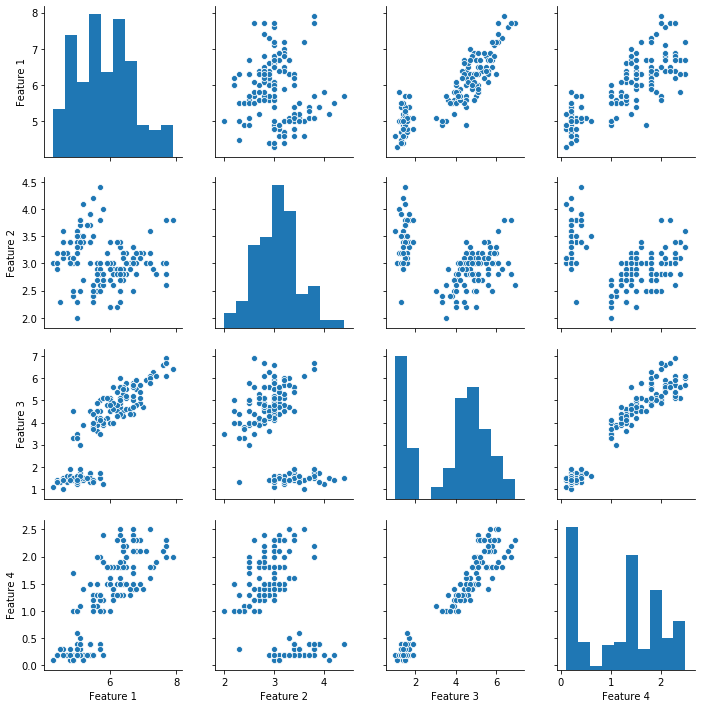

In [8]:
sns.pairplot(df)

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.95701115711985,
 34.32652991452992,
 30.227724598930486,
 27.766706937799047,
 26.07225182334006]

[]

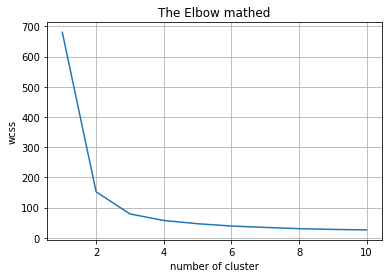

In [11]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow mathed")
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.grid(True)
plt.plot()

In [12]:
kmeans=KMeans(n_clusters=3,random_state=1)
ykmeans=kmeans.fit_predict(x)

In [13]:
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
df["Target"]=ykmeans

In [15]:
df

,Feature 1,Feature 2,Feature 3,Feature 4,Target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [17]:
y=df["Target"]

In [18]:
x=df.iloc[:,:-1]
x

,Feature 1,Feature 2,Feature 3,Feature 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: Target, Length: 150, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size = 0.25,random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.metrics import classification_report,confusion_matrix

In [22]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))

In [23]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()

In [24]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       1.00      1.00      1.00        13
           2       0.50      0.80      0.62         5

    accuracy                           0.87        38
   macro avg       0.81      0.87      0.83        38
weighted avg       0.90      0.87      0.88        38



In [25]:
mymodel(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [26]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00        13
           2       1.00      0.80      0.89         5

    accuracy                           0.97        38
   macro avg       0.98      0.93      0.95        38
weighted avg       0.97      0.97      0.97        38

